In [1]:
!pip install git+https://github.com/forrestbao/pyeeg.git

import pandas as pd
import keras.backend as K
import numpy as np
import pandas as pd
import pyeeg as pe
import pickle as pickle
import math
from sklearn import svm
from sklearn.preprocessing import normalize

import os
import time

  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-fxftf4ez
  Running command git clone -q https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-fxftf4ez
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28123 sha256=8704acf1b431ebb04a91056127fbc4cef04ad8f819da395c7356a0bedcf7659f
  Stored in directory: /tmp/pip-ephem-wheel-cache-6_om9w4x/wheels/2d/3f/ad/106d4fc80b61d1ea1fc18e76e7439fd98aa043d83d58eae741
Successfully built pyeeg


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution1D, MaxPooling1D, ZeroPadding1D,Conv1D
from keras.models import Sequential
from keras.utils import to_categorical 

from keras.models import Model
import timeit
from keras.optimizers import SGD

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Opening Data

In [4]:
with open('/content/drive/MyDrive/Colab Notebooks/DEAP  - saved/data_training.npy', 'rb') as fileX_training:
    X_train  = np.load(fileX_training)
    
with open('/content/drive/MyDrive/Colab Notebooks/DEAP  - saved/label_training.npy', 'rb') as fileY_training:
    Y_train  = np.load(fileY_training)  
    

In [5]:
X_train = normalize(X_train)
Z_train = np.ravel(Y_train[:, [1]])  # valence
#labels
train_arousal = np.ravel(Y_train[:, [0]])
train_valence = np.ravel(Y_train[:, [1]])
train_dominance = np.ravel(Y_train[:, [2]])
train_liking = np.ravel(Y_train[:, [3]])

In [6]:
X_train.shape


(45675, 70)

In [7]:

from keras.utils import to_categorical
y_train = to_categorical(Z_train)
x_train = np.array(X_train[:])

In [8]:
print(y_train.shape)

(45675, 10)


In [9]:
np.unique(x_train)

array([0.00170486, 0.00171934, 0.00194255, ..., 0.58262048, 0.58395395,
       0.58488571])

In [10]:

with open('/content/drive/MyDrive/Colab Notebooks/DEAP  - saved/data_testing.npy', 'rb') as fileX_training:
    X_test  = np.load(fileX_training)
    
with open('/content/drive/MyDrive/Colab Notebooks/DEAP  - saved/label_testing.npy', 'rb') as fileY_training:
    Y_test  = np.load(fileY_training)

In [11]:
X_test = normalize(X_test)
Z_test = np.ravel(Y_test[:, [1]]) # valence

test_arousal = np.ravel(Y_test[:, [0]])
test_valence = np.ravel(Y_test[:, [1]])
test_dominance = np.ravel(Y_test[:, [2]])
test_liking = np.ravel(Y_test[:, [3]])

In [12]:
x_test = np.array(X_test[:])

In [13]:
from keras.utils import to_categorical
y_test = to_categorical(Z_test)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [14]:
y_test.shape

(11421, 10)

In [15]:

from sklearn.preprocessing import StandardScaler
temp = StandardScaler()
x_train = temp.fit_transform(x_train)
x_test = temp.fit_transform(x_test)

In [16]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [17]:
x_train.shape


(45675, 70, 1)

In [20]:
classes = 10
iter = 100
shape=(x_train.shape[1], 1)

In [21]:
print(shape)


(70, 1)


# Building LSTM Model

In [22]:
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
from keras.regularizers import l2

In [23]:
  from keras.layers import Bidirectional
  from keras.layers import LSTM

  model_LSTM = Sequential()
 # Bidirection lstm layer
  model_LSTM.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=shape))
  model_LSTM.add(Dropout(0.5))
# simple one directional lstm layer
  model_LSTM.add(LSTM(units = 256, return_sequences = True))  
  model_LSTM.add(Dropout(0.4))

  model_LSTM.add(LSTM(units = 64, return_sequences = True))  
  model_LSTM.add(Dropout(0.5))

  model_LSTM.add(LSTM(units = 64, return_sequences = True))  
  model_LSTM.add(Dropout(0.2))

  model_LSTM.add(Flatten())

# At the end adding some dense layer
  model_LSTM.add(Dense(units = 16))
  model_LSTM.add(Activation('relu'))

  model_LSTM.add(Dense(units = classes))
  model_LSTM.add(Activation('softmax'))
  model_LSTM.compile(optimizer ="adam", loss =keras.losses.categorical_crossentropy,metrics=["accuracy"])
  model_LSTM.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 70, 256)           133120    
_________________________________________________________________
dropout (Dropout)            (None, 70, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 70, 256)           525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 70, 256)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 70, 64)            82176     
_________________________________________________________________
dropout_2 (Dropout)          (None, 70, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 70, 64)            3

In [24]:
  m=model_LSTM.fit(x_train, y_train,epochs=iter,batch_size=256,verbose=1,validation_data=(x_test, y_test))

Epoch 1/100
179/179 [==============================] - 63s 147ms/step - loss: 2.0097 - accuracy: 0.2624 - val_loss: 1.8741 - val_accuracy: 0.2945
Epoch 2/100
179/179 [==============================] - 24s 135ms/step - loss: 1.8710 - accuracy: 0.2931 - val_loss: 1.8454 - val_accuracy: 0.2857
Epoch 3/100
179/179 [==============================] - 24s 135ms/step - loss: 1.8431 - accuracy: 0.2963 - val_loss: 1.8242 - val_accuracy: 0.3079
Epoch 4/100
179/179 [==============================] - 24s 134ms/step - loss: 1.8230 - accuracy: 0.3045 - val_loss: 1.8030 - val_accuracy: 0.3142
Epoch 5/100
179/179 [==============================] - 24s 135ms/step - loss: 1.8047 - accuracy: 0.3115 - val_loss: 1.7762 - val_accuracy: 0.3236
Epoch 6/100
179/179 [==============================] - 24s 135ms/step - loss: 1.7849 - accuracy: 0.3203 - val_loss: 1.7489 - val_accuracy: 0.3376
Epoch 7/100
179/179 [==============================] - 24s 135ms/step - loss: 1.7710 - accuracy: 0.3303 - val_loss: 1.7403 -

In [25]:
model_score = model_LSTM.evaluate(x_test, y_test, verbose=1)
print('Test loss:', model_score[0])
print('Test accuracy:', model_score[1])

357/357 [==============================] - 15s 43ms/step - loss: 0.5834 - accuracy: 0.8557
Test loss: 0.583440899848938
Test accuracy: 0.8557044267654419


In [26]:
# list all data in history
print(m.history.keys())
import matplotlib.pyplot as plt
import numpy


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Plots -  epcohs vs Accuracy/loss

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


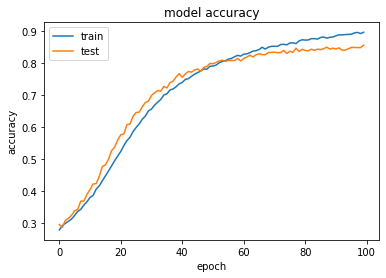

In [27]:
import matplotlib.pyplot as plt
print(m.history.keys())
# summarize history for accuracy
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

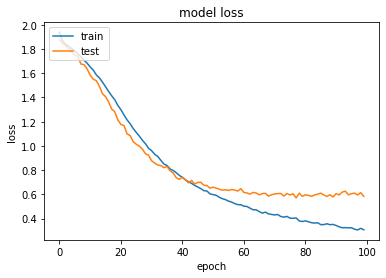

In [28]:
# summarize history for loss
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

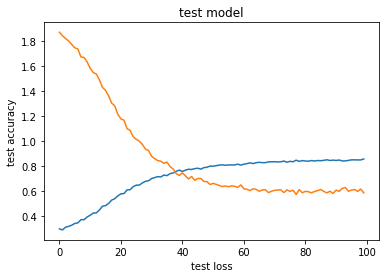

In [29]:
plt.plot(m.history['val_accuracy'])
plt.plot(m.history['val_loss'])
plt.title('test model')
plt.ylabel('test accuracy')
plt.xlabel('test loss')
plt.show()

In [30]:
M=m


In [31]:
y_pred=model_LSTM.predict(x_test)
from sklearn.metrics import confusion_matrix
import numpy as np

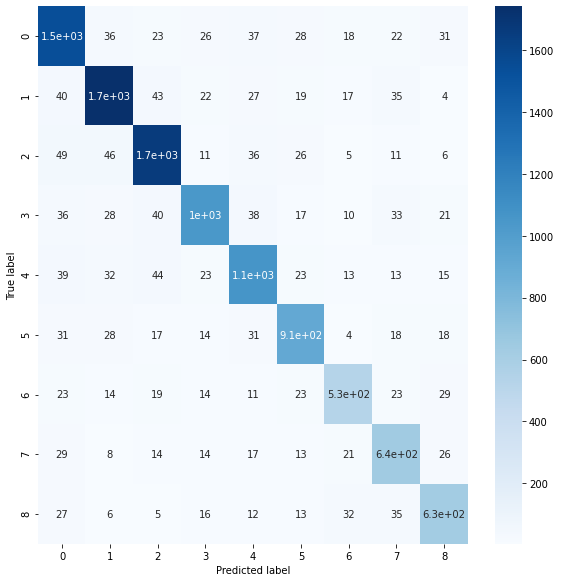

In [32]:
y_test[1]
y_pred[1]
y_test1=np.argmax(y_test, axis=1)
y_pred=np.argmax(y_pred,axis=1)
cmatrix=confusion_matrix(y_test1, y_pred)
import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(cmatrix, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [33]:
m

# ROC curves

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [35]:
# make probability predictions with the model
predictions = model_LSTM.predict(x_test)
# round predictions 
rounded = [round(x[0]) for x in predictions]
rounded = np.array(rounded)
rounded.shape

(11421,)

In [36]:
# make class predictions with the model
predictions = model_LSTM.predict_classes(x_test)

In [37]:
temp = label_binarize(predictions,classes = [0,1,2,3,4,5,6,7,8,9] )
temp
temp1 = label_binarize(y_test,classes = [0,1,2,3,4,5,6,7,8,9] )
temp1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [50]:
false_pr = dict()
true_pr = dict()
roc_auc = dict()
for i in range(classes-1):
    false_pr[i], true_pr[i], _ = roc_curve(temp1[:, i], temp[:, i])
    roc_auc[i] = auc(false_pr[i], true_pr[i])

false_pr["micro"], true_pr["micro"], _ = roc_curve(temp1.ravel(), temp.ravel())
roc_auc["micro"] = auc(false_pr["micro"], true_pr["micro"])

In [52]:
classes = classes-1
lw = 2

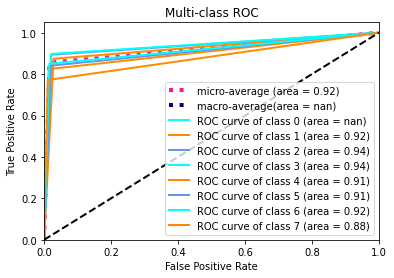

In [53]:
combined_fpr = np.unique(np.concatenate([false_pr[i] for i in range(classes)]))

# Then interpolate all ROC curves at this points
average_tpr = np.zeros_like(combined_fpr)
for i in range(classes):
    average_tpr += interp(combined_fpr, false_pr[i], true_pr[i])

average_tpr /= (classes)

false_pr["macro"] = combined_fpr
true_pr["macro"] = average_tpr
roc_auc["macro"] = auc(false_pr["macro"], true_pr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(false_pr["micro"], true_pr["micro"],
         label='micro-average (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(false_pr["macro"], true_pr["macro"],
         label='macro-average(area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(classes), colors):
    plt.plot(false_pr[i], true_pr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

In [54]:
cm = cmatrix
cm

array([[1539,   36,   23,   26,   37,   28,   18,   22,   31],
       [  40, 1742,   43,   22,   27,   19,   17,   35,    4],
       [  49,   46, 1666,   11,   36,   26,    5,   11,    6],
       [  36,   28,   40, 1046,   38,   17,   10,   33,   21],
       [  39,   32,   44,   23, 1067,   23,   13,   13,   15],
       [  31,   28,   17,   14,   31,  914,    4,   18,   18],
       [  23,   14,   19,   14,   11,   23,  528,   23,   29],
       [  29,    8,   14,   14,   17,   13,   21,  638,   26],
       [  27,    6,    5,   16,   12,   13,   32,   35,  633]])

In [55]:
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

In [43]:
print(recall)
print(precision)

[0.87443182 0.89379169 0.89762931 0.82427108 0.84081954 0.85023256
 0.77192982 0.81794872 0.81258023]
[0.84886928 0.89793814 0.89043292 0.88195616 0.8362069  0.84944238
 0.81481481 0.7705314  0.80842912]


In [56]:
print("Recall",np.nanmean(recall))
print("precision",np.nanmean(precision))

Recall 0.8426260856471504
precision 0.8442912345303388
